# Project on Data Sciences and Machine Learning

## Model Training and Fitting

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import various functions from sklearn 


# importing algorithms from Sci-kit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier #1
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #1
from sklearn.neighbors import KNeighborsClassifier #1
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")


### Model Fitting

In [232]:
df_model = pd.read_csv('diabetic_data_cleaned.csv')
#df_model = pd.read_csv('diabetic_data_encoded.csv')

In [233]:
df_model.shape

(2812, 98)

In [234]:
X = df_model.drop('readmitted',axis=1)

y = df_model['readmitted']

train_test_split from sklearn.model_selection is a function that splits arrays or matrices into random train and test subsets. It is a fundamental tool in machine learning for evaluating model performance on unseen data, preventing overfitting, and ensuring the model generalizes well.
X: The feature dataset.
y: The target variable dataset.
test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%).
random_state: Seed for the random number generator to ensure reproducibility.

In [235]:
from sklearn.model_selection import train_test_split #1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [236]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve



def calc_scores(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred )
    
    return auc, accuracy, recall, precision,f1
     

thresh = 0.5

Terminology

roc_auc_score - Area under ROC curve (higher = better separability) Computes the Area Under the ROC Curve (AUC) for binary or multi-class classification.The ROC AUC measures the model’s ability to distinguish between classes. A score of 1.0 = perfect classification; 0.5 = random guessing.

ROC - ROC stands for Receiver Operating Characteristic. It’s a curve used to evaluate the performance of a binary classifier at all possible thresholds. The term comes from signal detection theory during WWII, where it measured the ability of radar systems to distinguish between enemy targets and noise. "Receiver" = the system making a decision; "Operating Characteristic" = how it performs at different thresholds


accuracy_score - Proportion of correct predictions (Accuracy= Number of correct predictions/Total number of predictions)

precision_score - Of predicted positives, how many are actually positive Precision= True Positives (TP) / (TP + False Positives (FP))
​
recall_score - Of actual positives, how many did we find? Recall= True Positives (TP) /(TP + False Negatives (FN))

​f1_score - Harmonic mean of precision and recall The F1-score combines Precision and Recall into a single metric:
F1-score = 2 * ((Precision * Recall) / (Precision+Recall))
​
fpr - The False Positive Rate (FPR) measures how often a model incorrectly labels a negative instance as positive.
FPR= False Positives (FP) / (False Positives (FP)+True Negatives (TN)). A low FPR is good — it means the model is not triggering too many false alarms.

tpr - HThe True Positive Rate (TPR) measures how well the model identifies actual positives:
TPR= True Positives (TP) / (True Positives (TP)+False Negatives (FN)). A high TPR means the model rarely misses positive cases.

​



Results
                            f1  Accuracy       auc  \
Random Forest              0.0    0.9254       0.5   
Decision Tree         0.155172  0.825933  0.544763   
Gradient Boosting          0.0  0.920071  0.497121   
KNeighborsClassifier       0.0  0.920071  0.497121   
Logistic Regression        0.0    0.9254       0.5   

                                                   fpr  \
Random Forest                               [0.0, 1.0]   
Decision Tree          [0.0, 0.12476007677543186, 1.0]   
Gradient Boosting     [0.0, 0.005758157389635317, 1.0]   
KNeighborsClassifier  [0.0, 0.005758157389635317, 1.0]   
Logistic Regression                         [0.0, 1.0]   

                                                  tpr  
Random Forest                              [0.0, 1.0]  
Decision Tree         [0.0, 0.21428571428571427, 1.0]  
Gradient Boosting                     [0.0, 0.0, 1.0]  
KNeighborsClassifier                  [0.0, 0.0, 1.0]  
Logistic Regression                 

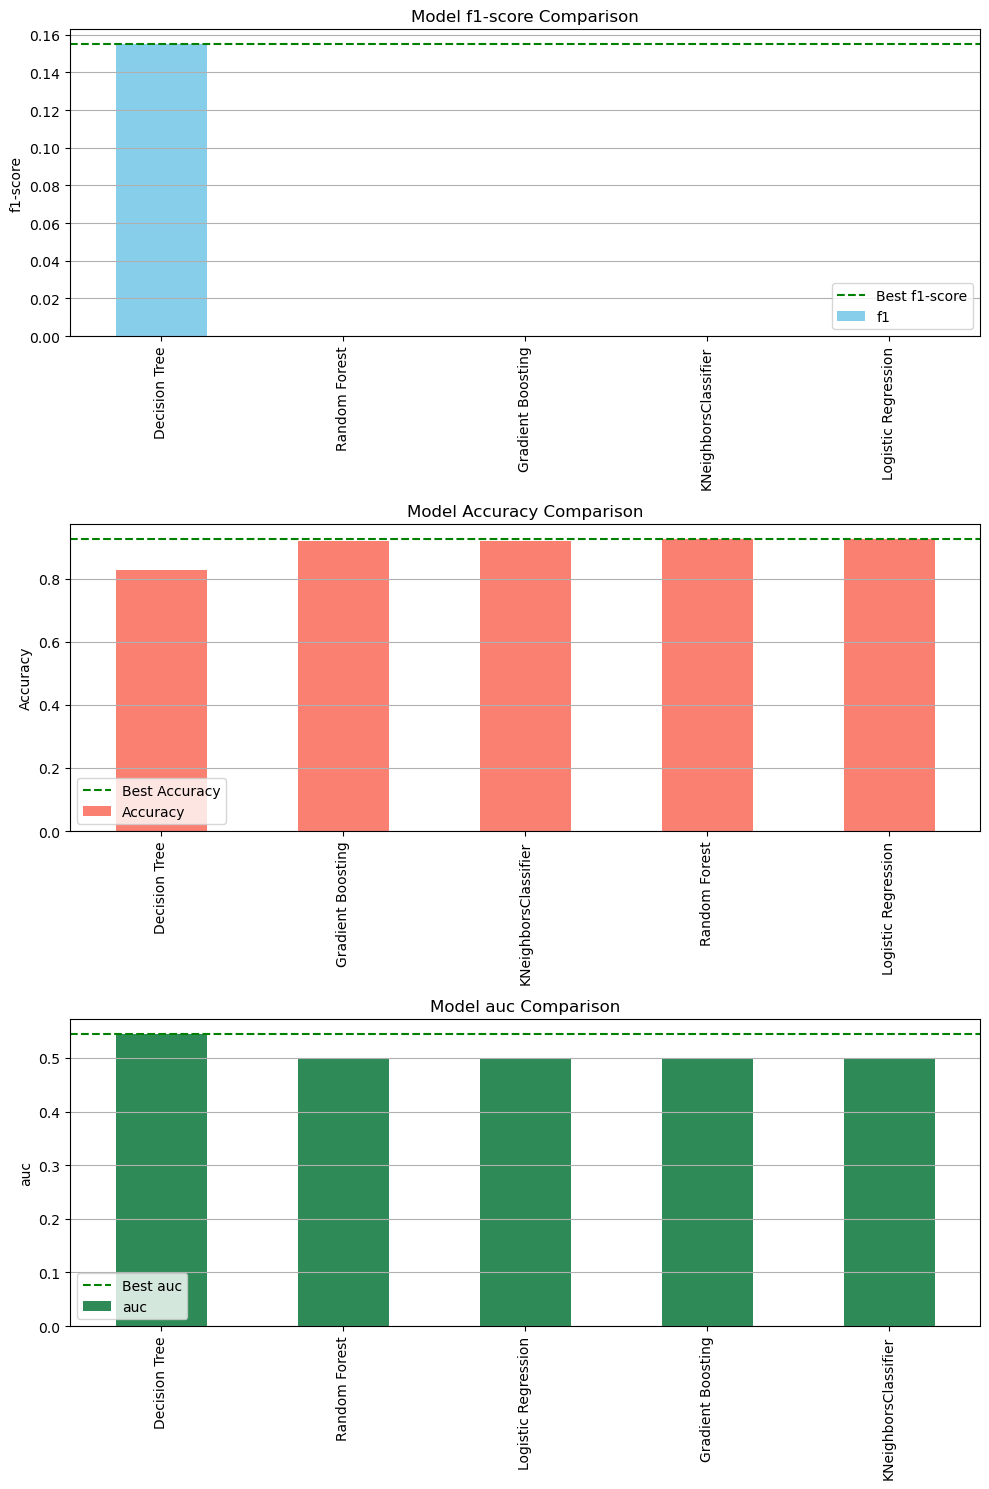

In [237]:
# Train and evaluate each model

results = {}

# Define models
models = {
   
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print(y_pred)


    #accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
    #f1 = f1_score(y_test, y_pred)

    auc,accuracy,recall,precision,f1 = calc_scores(y_test,y_pred, thresh)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)


    results[name] = {

        'f1': f1,
        'Accuracy': accuracy,
        'auc':auc,
        'fpr':fpr,
        'tpr':tpr
    }



# Display the results
results_df = pd.DataFrame(results).T #Transpose
print()
print()
print("Results")
print(results_df)

print()
print()
print('Conclusion')
print()


max_f1_model = max(results, key=lambda name: results[name]['f1'])
max_accuracy_model = max(results, key=lambda name: results[name]['Accuracy'])
max_auc_model = max(results, key=lambda name: results[name]['auc'])


print(f"The model with the highest accuracy is: {max_accuracy_model}")
print(f"The model with the highest f1-score is: {max_f1_model}")
print(f"The model with the Lowest auc is: {max_auc_model}")
print()
print()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy plot
results_df.sort_values("f1", ascending=False).plot(kind='bar', y='f1', ax=axes[0], color='skyblue')
axes[0].set_title('Model f1-score Comparison')
axes[0].set_ylabel('f1-score')
axes[0].grid(axis='y')
axes[0].axhline(results[max_f1_model]['f1'], color='green', linestyle='--', label='Best f1-score')
axes[0].legend()

# Accuracy plot
results_df.sort_values("Accuracy", ascending=True).plot(kind='bar', y='Accuracy', ax=axes[1], color='salmon')
axes[1].set_title('Model Accuracy Comparison')
axes[1].set_ylabel('Accuracy')
axes[1].grid(axis='y')
axes[1].axhline(results[max_accuracy_model]['Accuracy'], color='green', linestyle='--', label='Best Accuracy')
axes[1].legend()

# AUC plot
results_df.sort_values("auc", ascending=False).plot(kind='bar', y='auc', ax=axes[2], color='seagreen')
axes[2].set_title('Model auc Comparison')
axes[2].set_ylabel('auc')
axes[2].grid(axis='y')
axes[2].axhline(results[max_auc_model]['auc'], color='green', linestyle='--', label='Best auc')
axes[2].legend()

plt.tight_layout()
plt.show()

In [238]:
DT=DecisionTreeClassifier()

DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [239]:
y_pred = DT.predict(X_test)

In [240]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.astype(int), y_pred.astype(int))
cm

array([[455,  66],
       [ 32,  10]], dtype=int64)

A confusion matrix is a tool used in machine learning to evaluate the performance of a classification model by comparing its predicted labels to the actual labels. It's a table that visualizes the counts of true positives, true negatives, false positives, and false negatives. 
True Positives (TP):
The model correctly predicted positive instances (e.g., correctly identified a dog as a dog). 
True Negatives (TN):
The model correctly predicted negative instances (e.g., correctly identified a cat as not a dog). 
False Positives (FP):
The model incorrectly predicted positive instances (e.g., incorrectly identified a cat as a dog). 
False Negatives (FN):
The model incorrectly predicted negative instances (e.g., incorrectly identified a dog as not a dog). 

Used to understand Accuracy, Precision, Recall and F1-score.

In [ ]:
TP=cm[0,0]
FP=cm[1,1]
FN=cm[1,0]
TN=cm[1,1]

In [242]:
print('TP',TP)
print('FP',FP)
print('FN',FN)
print('TN',TN)

TP 455
FP 66
FN 32
TN 10


In [243]:
CF_Accuracy= (TP+TN) / (TP+TN+FP+FN)
#CF_Accuracy=(8304+7915) / (8304+797+1066+7915)
CF_Accuracy

0.8259325044404974

In [244]:
CF_Precision=TP / (TP+FP)
CF_Precision

0.8733205374280231

In [262]:
CF_Precision1=TN / (TN+FN)
CF_Precision1

0.23809523809523808

In [245]:
CF_Recall = TP / (TP+FN)
CF_Recall

0.9342915811088296

In [246]:
CF_F1Score= 2 * ((CF_Precision * CF_Recall) / (CF_Precision+CF_Recall))
CF_F1Score

0.9027777777777779

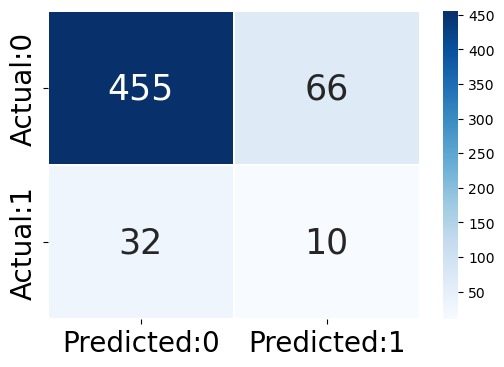

In [247]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [248]:
from sklearn.metrics import classification_report

print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       521
           1       0.13      0.24      0.17        42

    accuracy                           0.83       563
   macro avg       0.53      0.56      0.54       563
weighted avg       0.87      0.83      0.85       563



In [249]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

SMOTE - Synthetic Minority Over-sampling Technique
SMOTE is a technique used to handle imbalanced datasets in classification by creating synthetic samples of the minority class

In [250]:
smote=SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
DT.fit(X_resampled, y_resampled)
y_pred = DT.predict(X_resampled)
confusion_matrix(y_resampled.astype(int), y_pred.astype(int))

array([[2027,    0],
       [   2, 2025]], dtype=int64)

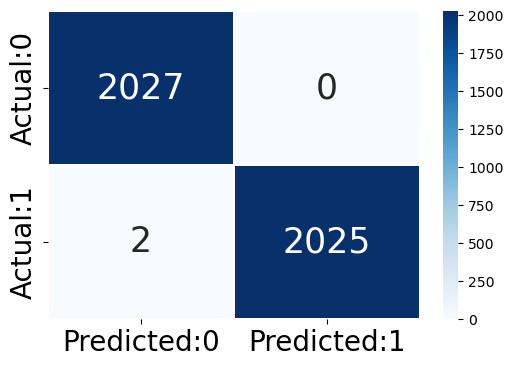

In [251]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_resampled.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [252]:
print(classification_report(y_resampled.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2027
           1       1.00      1.00      1.00      2027

    accuracy                           1.00      4054
   macro avg       1.00      1.00      1.00      4054
weighted avg       1.00      1.00      1.00      4054



In [253]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba=DT.predict_proba(X_resampled)[:, 1]
auc = roc_auc_score(y_resampled, y_proba)
print(f"AUC Score: {auc:.4f}")

AUC Score: 1.0000


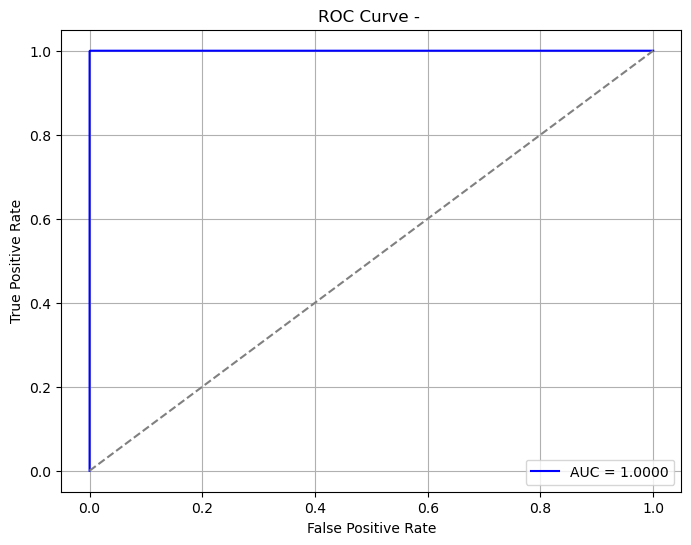

In [254]:
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_resampled, y_proba)
auc_score = roc_auc_score(y_resampled, y_proba)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - " )
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [255]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

RF=RandomForestClassifier()

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

RF.fit(X_resampled, y_resampled)
y_pred = RF.predict(X_resampled)
cf=confusion_matrix(y_resampled.astype(int), y_pred.astype(int))
print(cf)
y_proba=RF.predict_proba(X_resampled)[:, 1]
auc = roc_auc_score(y_resampled, y_proba)
print(f"AUC Score: {auc:.4f}")


[[2026    1]
 [   0 2027]]
AUC Score: 1.0000


Random Forest [[2027    0]
 [   1 2026]]
Decision Tree [[2027    0]
 [   1 2026]]
Gradient Boosting [[1815  212]
 [ 272 1755]]
KNeighborsClassifier [[1516  511]
 [  13 2014]]
Logistic Regression [[1683  344]
 [ 387 1640]]


Results
                            f1  Accuracy Precision  \
Random Forest         0.999753  0.999753       1.0   
Decision Tree         0.999753  0.999753       1.0   
Gradient Boosting     0.878818  0.880612  0.892222   
KNeighborsClassifier  0.884886  0.870745  0.797624   
Logistic Regression   0.817751  0.819684  0.826613   

                                                             Recall       auc  \
Random Forest         <function recall_score at 0x000001632684FBA0>  0.999753   
Decision Tree         <function recall_score at 0x000001632684FBA0>  0.999753   
Gradient Boosting     <function recall_score at 0x000001632684FBA0>  0.880612   
KNeighborsClassifier  <function recall_score at 0x000001632684FBA0>  0.870745   
Logistic Regression   <function recall

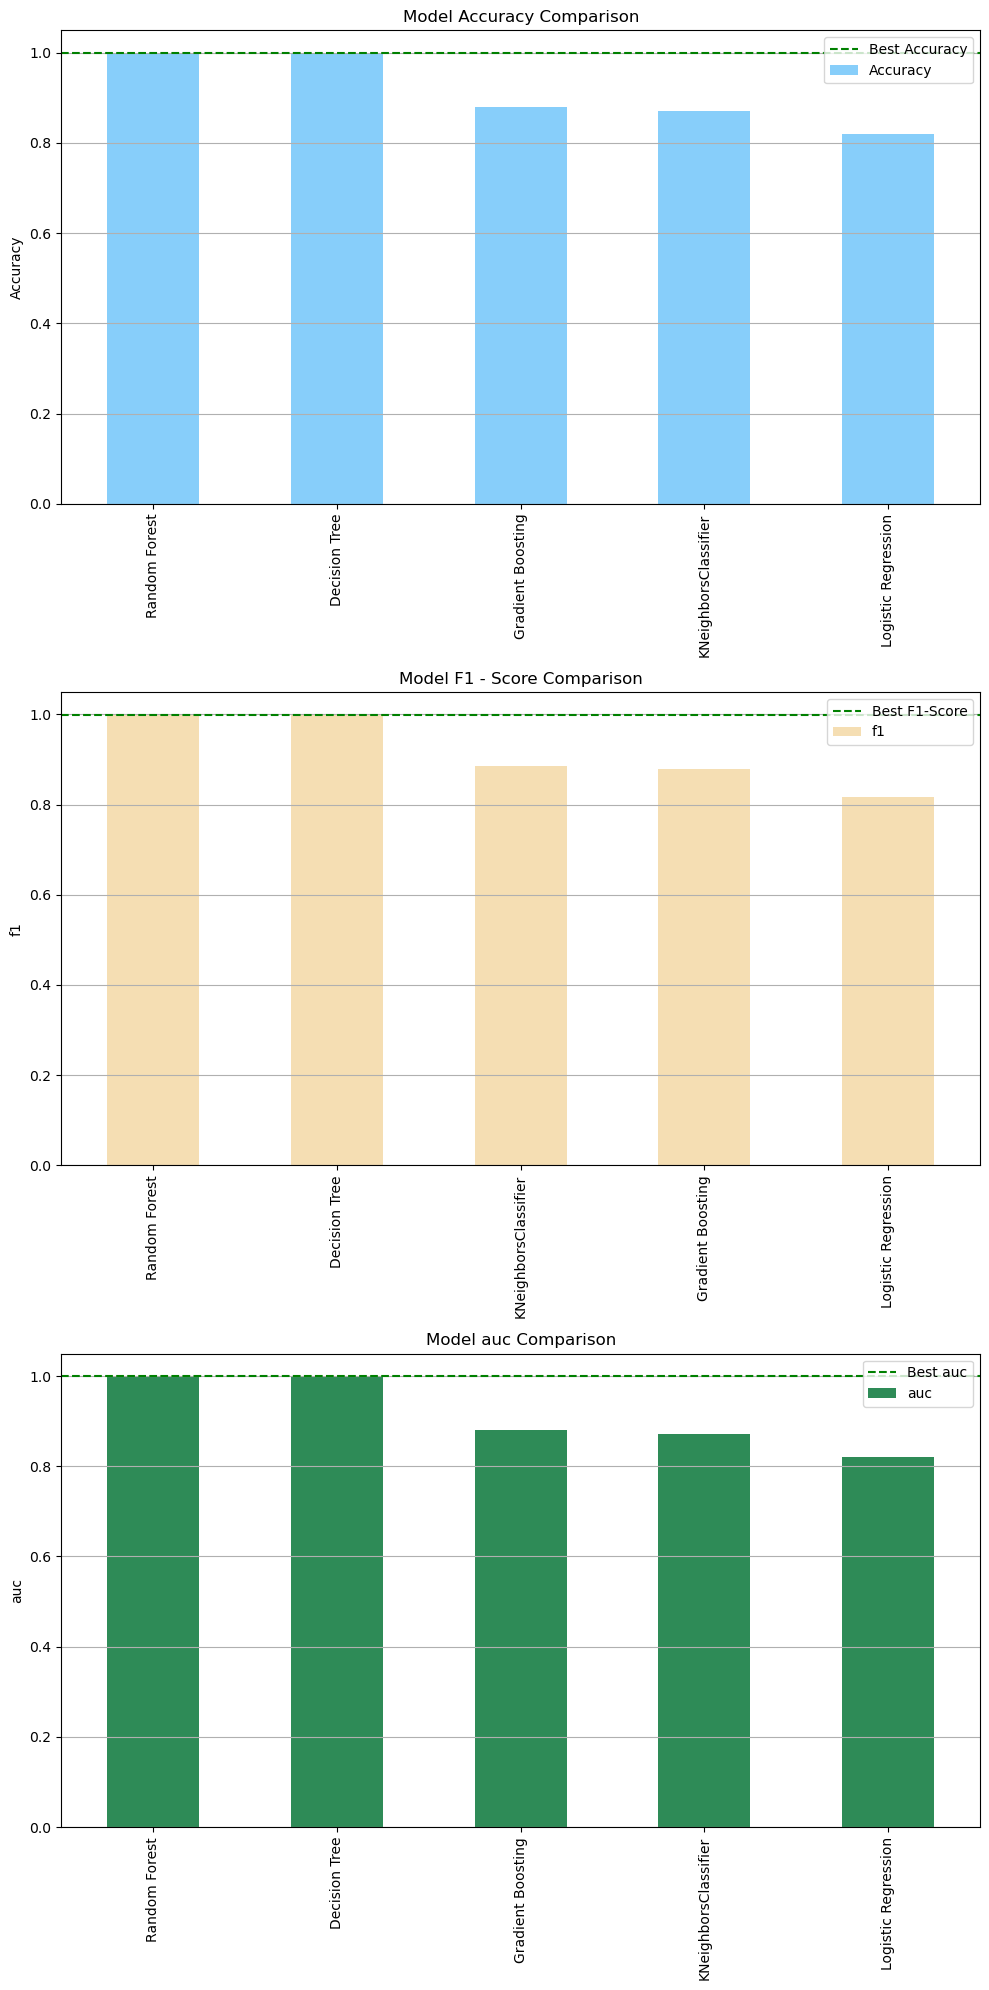

In [ ]:
# Train and evaluate each model with SMOTE
results = {}


# Define models
models = {

    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()

}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_resampled)

    conf= confusion_matrix(y_resampled.astype(int), y_pred.astype(int))
    print(name, conf)

    y_proba=RF.predict_proba(X_resampled)[:, 1]
    auc = roc_auc_score(y_resampled, y_proba)
    
    f1 = f1_score(y_resampled, y_pred)

    auc,accuracy,recall,precision,f1 = calc_scores(y_resampled,y_pred, thresh)
 
    fpr, tpr, thresholds = roc_curve(y_resampled, y_pred)

    
    results[name] = {
    'f1': f1,
    'Accuracy': accuracy,
    'Precision':precision,
    'Recall':recall_score,
    'auc':auc,
    'fpr':fpr,
    'tpr':tpr
    }

    
# Display the results
results_df = pd.DataFrame(results).T #Transpose
print()
print()
print("Results")
print(results_df)


print()


max_accuracy_model = max(results, key=lambda name: results[name]['Accuracy'])
max_f1_model = max(results, key=lambda name: results[name]['f1'])
max_auc_model = max(results, key=lambda name: results[name]['auc'])


print()
print()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# Accuracy plot
results_df.sort_values("Accuracy", ascending=False).plot(kind='bar', y='Accuracy', ax=axes[0], color='lightskyblue')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].grid(axis='y')
axes[0].axhline(results[max_accuracy_model]['Accuracy'], color='green', linestyle='--', label='Best Accuracy')
axes[0].legend()

# F1-Score
results_df.sort_values("f1", ascending=False).plot(kind='bar', y='f1', ax=axes[1], color='wheat')
axes[1].set_title('Model F1 - Score Comparison')
axes[1].set_ylabel('f1')
axes[1].grid(axis='y')
axes[1].axhline(results[max_f1_model]['f1'], color='green', linestyle='--', label='Best F1-Score')
axes[1].legend()

# AUC plot
results_df.sort_values("auc", ascending=False).plot(kind='bar', y='auc', ax=axes[2], color='seagreen')
axes[2].set_title('Model auc Comparison')
axes[2].set_ylabel('auc')
axes[2].grid(axis='y')
axes[2].axhline(results[max_auc_model]['auc'], color='green', linestyle='--', label='Best auc')
axes[2].legend()

plt.tight_layout()
plt.show()

# Analyzing the models

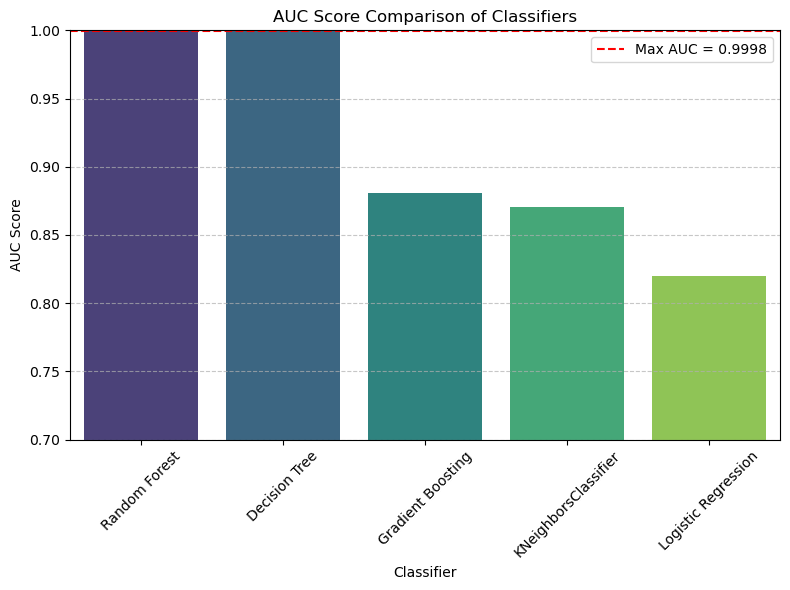

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_analysis = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Classifier'})
max_auc = df_analysis['auc'].max()
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_analysis, x='Classifier', y='auc', palette='viridis')

plt.title('AUC Score Comparison of Classifiers')
plt.ylabel('AUC Score')
plt.xlabel('Classifier')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.axhline(y=max_auc, color='red', linestyle='--', linewidth=1.5, label=f'Max AUC = {max_auc:.4f}')
plt.legend()
plt.show()

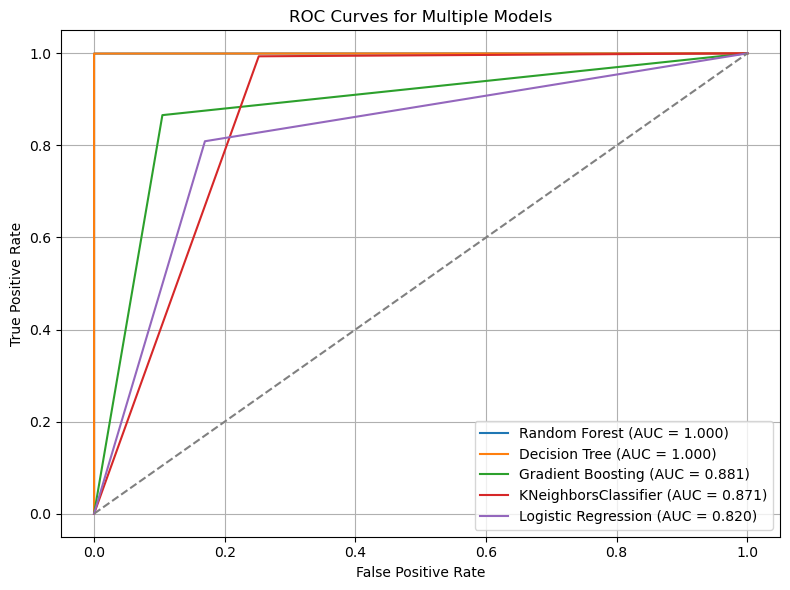

In [258]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, metrics in results.items():
    fpr = metrics['fpr']
    tpr = metrics['tpr']
    auc = metrics['auc']
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title("ROC Curves for Multiple Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Saving
### Based on AUC, decided to take RF as the fitting model.

In [259]:
import pickle

RF=RandomForestClassifier()
RF.fit(X_resampled,y_resampled)
y_pred = RF.predict(X_resampled)
with open('Random.pkl', 'wb') as f:
    pickle.dump(RF, f)

In [260]:
import joblib

RF=RandomForestClassifier()
RF.fit(X_resampled,y_resampled)
y_pred = RF.predict(X_resampled)

joblib.dump(RF, 'RandomCjob.joblib')

['RandomCjob.joblib']

In [261]:
acc1 = accuracy_score(y_resampled, y_pred)

# Method 2: From classification_report
report = classification_report(y_resampled, y_pred, output_dict=True)
acc2 = report['accuracy']

print("accuracy_score:", acc1)
print("classification_report['accuracy']:", acc2)

accuracy_score: 0.9997533300444006
classification_report['accuracy']: 0.9997533300444006
